# Hands-On Exploratory Data Analysis with Python
    
    AUTHORS: Suresh Kumar Mukhiya, Usman Ahmed

### Chapter 7: Correlation

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import os
DIR = "C:\Coding\Masters\DataScience\Semana 4\Hands-On-EDA_Correlation"
os.chdir(DIR)

In [5]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


# Bivariate Analysis


Text(0, 0.5, 'price')

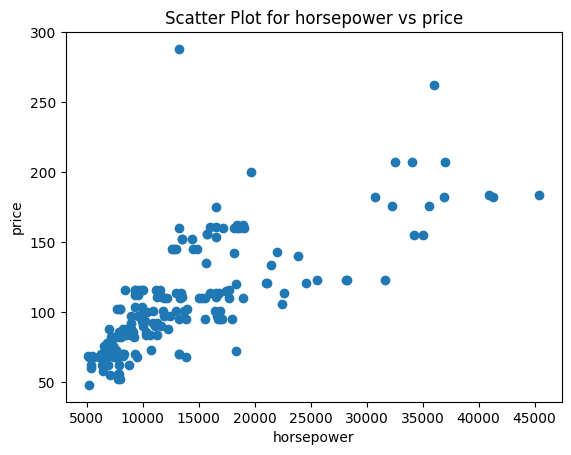

In [6]:
# plot the relationship between “horsepower” and ”price”
import matplotlib.pyplot as plt
plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

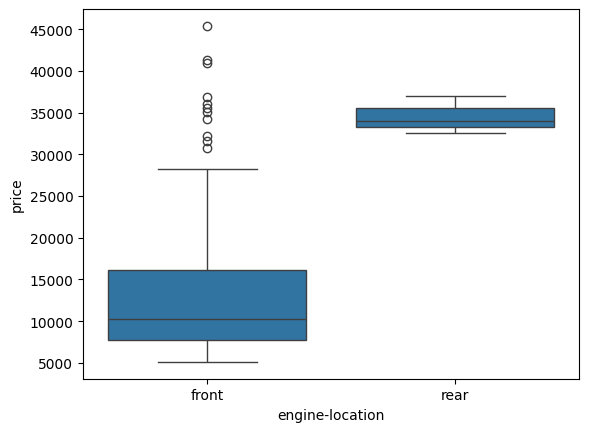

In [7]:
#boxplot
import seaborn as sns
sns.boxplot(x="engine-location",y="price",data=df)
plt.show()

<Axes: xlabel='drive-wheels', ylabel='price'>

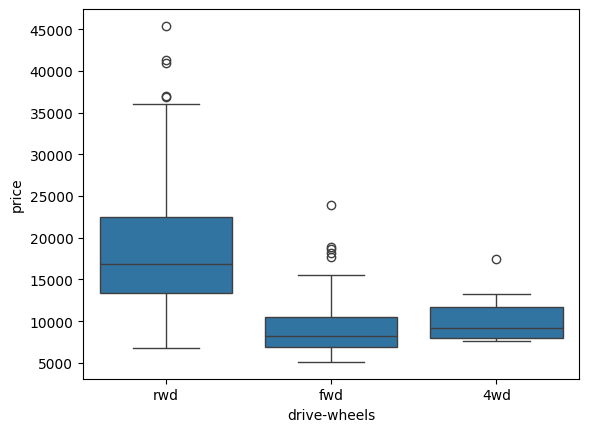

In [8]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)

Figure above illustrates the range of prices in cars with different wheel types. Boxplot shows the average and median price in respective wheel types and some outliers.

# Multivariate Analysis



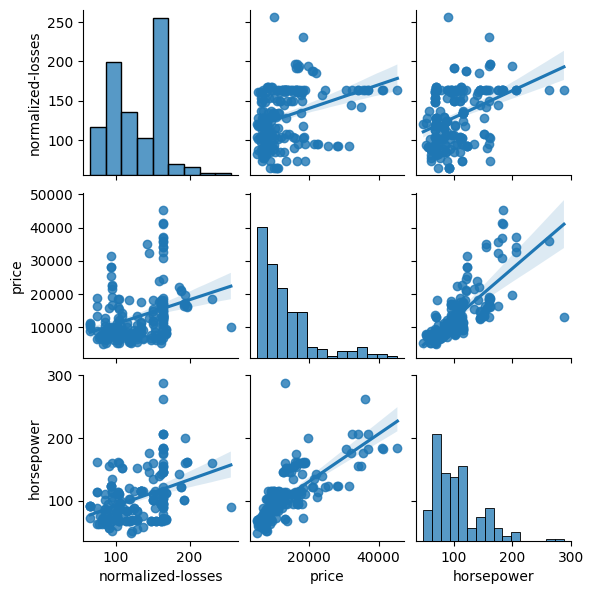

In [9]:
# pair plot with plot type regression
sns.pairplot(df,height=2, vars = ['normalized-losses', 'price','horsepower'],  kind="reg")
plt.show()

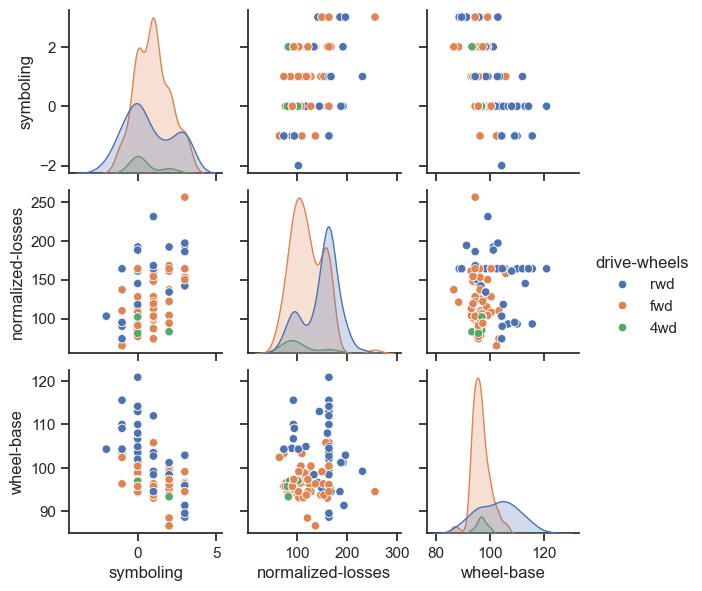

In [10]:
 #pair plot (matrix scatterplot) of few columns 
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")
plt.show()

In [11]:
from scipy import stats

corr = stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

ModuleNotFoundError: No module named 'scipy'

Here the correlation of these two variable is 0.759 which is close to +1 thus we can make sure that price and horsepower are highly positively correlated. Using pandas corr( function correlation between entire numerical record can be calculated.

In [ ]:
correlation = df.corr(method='pearson')
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.446613,-0.532929,-0.357856,-0.232241,-0.541323,-0.228520,-0.105985,-0.133130,-0.007956,-0.172343,0.068312,0.272162,-0.030513,0.040374,-0.083020
normalized-losses,0.446613,1.000000,0.044916,0.158185,0.212157,-0.349461,0.265983,0.303717,0.082768,0.099114,-0.113747,0.378103,0.190214,-0.354567,-0.317451,0.330624
wheel-base,-0.532929,0.044916,1.000000,0.874651,0.794488,0.588281,0.775870,0.568141,0.488138,0.163744,0.254105,0.353285,-0.359843,-0.475257,-0.549141,0.582379
length,-0.357856,0.158185,0.874651,1.000000,0.840300,0.486316,0.878719,0.682984,0.604518,0.132778,0.154219,0.559618,-0.283068,-0.682433,-0.715913,0.683494
width,-0.232241,0.212157,0.794488,0.840300,1.000000,0.274216,0.867307,0.735016,0.556721,0.185110,0.178893,0.646575,-0.216229,-0.651892,-0.686216,0.728917
height,-0.541323,-0.349461,0.588281,0.486316,0.274216,1.000000,0.293892,0.063622,0.169575,-0.056016,0.253871,-0.107707,-0.316713,-0.056337,-0.115209,0.132614
curb-weight,-0.228520,0.265983,0.775870,0.878719,0.867307,0.293892,1.000000,0.850236,0.648345,0.171289,0.156838,0.752603,-0.266077,-0.762457,-0.802444,0.820439
engine-size,-0.105985,0.303717,0.568141,0.682984,0.735016,0.063622,0.850236,1.000000,0.592931,0.209022,0.029468,0.812981,-0.243784,-0.658584,-0.682212,0.861545
bore,-0.133130,0.082768,0.488138,0.604518,0.556721,0.169575,0.648345,0.592931,1.000000,-0.054250,-0.001731,0.580690,-0.260465,-0.603529,-0.602912,0.531935
stroke,-0.007956,0.099114,0.163744,0.132778,0.185110,-0.056016,0.171289,0.209022,-0.054250,1.000000,0.185802,0.090862,-0.071544,-0.046312,-0.048075,0.084217


Now let's visualize this correlation analysis with heatmap. Heatmap is best technique to make this look beautiful and easier to interpret.

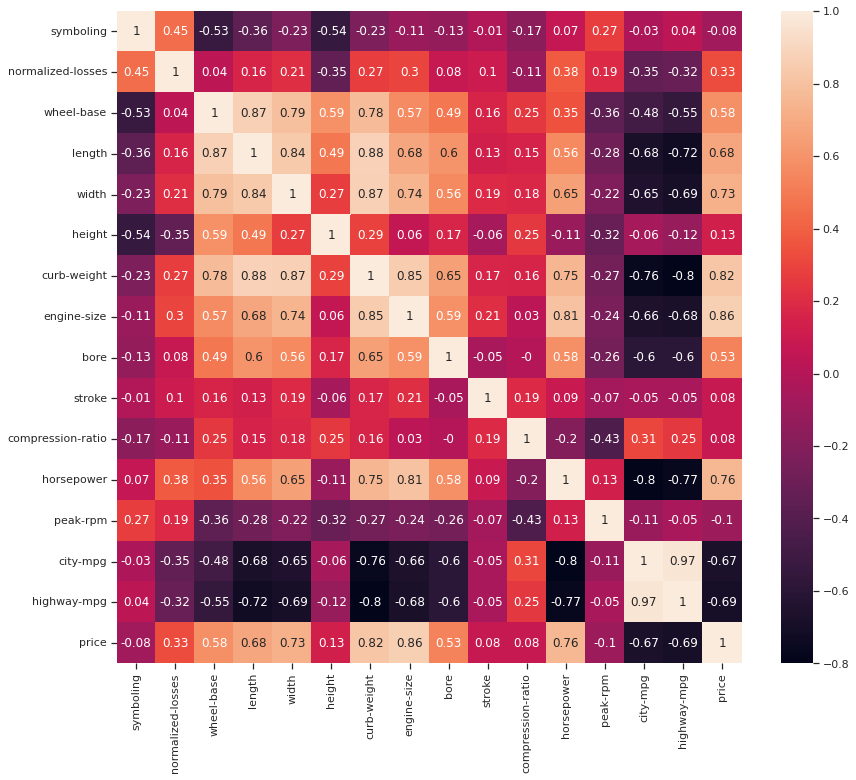

In [ ]:
plt.rcParams['figure.figsize'] = (14, 12)
sns.heatmap(round(correlation,2), annot=True)

A coefficient close to 1 means that there’s a very strong positive correlation between the two variables. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.

# Multivariate Analysis over titanic dataset


In [ ]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape

(891, 12)

Let’s take a  look at what is the number of records missing in the data set.

In [ ]:
total = titanic.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
#percentage of women survived
women = titanic.loc[titanic.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

#percentage of men survived
men = titanic.loc[titanic.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(str(rate_women) +" % of women who survived." )
print(str(rate_men) + " % of men who survived." )

0.7420382165605095 % of women who survived.
0.18890814558058924 % of men who survived.


You can see the number of females survival was high, so gender could be the attribute that contributes to analyzing the survival of any variable(person). Let's visualize this information on survival numbers in males and females.

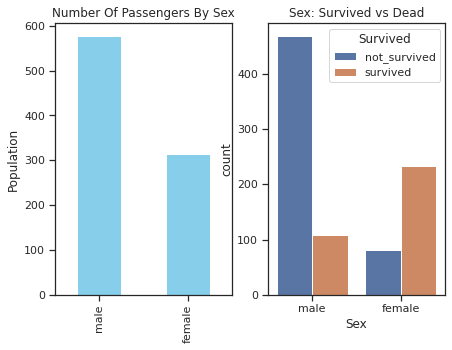

In [ ]:
titanic['Survived'] = titanic['Survived'].map({0:"not_survived", 1:"survived"})

fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot(x = "Sex", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

Let's visualize the number of survival and death from different Pclasses.

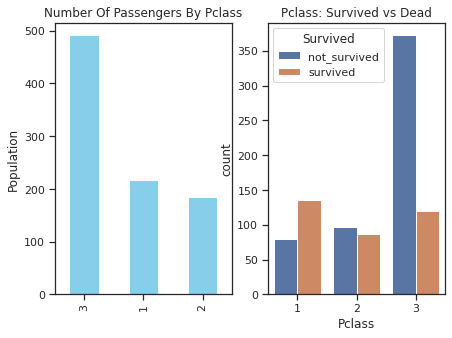

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot(x = "Pclass", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

Looks like the number of passenger in Pclass 3 was high and maximum of them could not survive. death  Pclass the number of death is high. And in Pclass 1 maximum of the passengers were survived.

In [ ]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,not_survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,not_survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,not_survived,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,not_survived,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


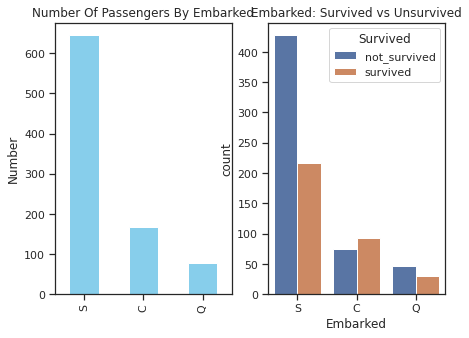

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Embarked"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot(x = "Embarked", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

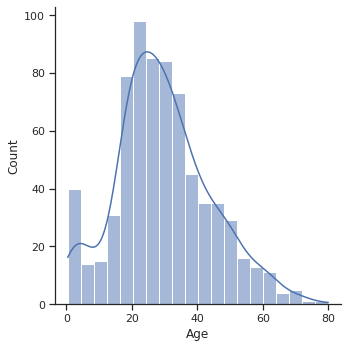

In [ ]:
sns.displot(titanic['Age'].dropna(), kde=True)

Now let's do first multivariate analysis into titanic data set with variables Survived, Pclass,Fear and Age. 

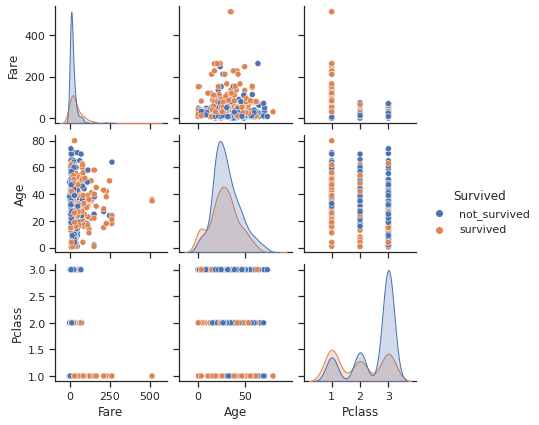

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic,height=2,vars = [ 'Fare','Age','Pclass'], hue="Survived")
plt.show()

Now lets' view the correlation table with heatmap. But first map Embarked records with integer values so that we can include Embrake too in our correlation analysis.

In [ ]:
titanic['Embarked'] = titanic['Embarked'].map({"S":1, "C":2,"Q":2,"NaN":0})
Tcorrelation = titanic.corr(method='pearson')
Tcorrelation

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.022204
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.074053
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.023233
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.068734
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.060814
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.162184
Embarked,-0.022204,-0.074053,0.023233,-0.068734,-0.060814,0.162184,1.000000


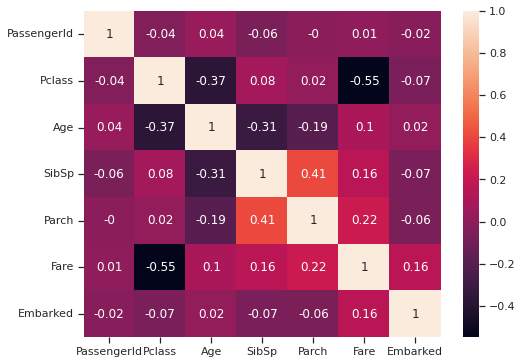

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(round(Tcorrelation,2), annot=True)